In [0]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [0]:
df=pd.read_csv("/content/employee_data.csv",sep='\t')
df.head()

,age,employment_type,salary,education,marital-status,relationship,Gender,hours_per_week
0,39,State-gov,77516,Bachelors,Never-married,Not-in-family,Male,40
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Husband,Male,13
2,38,Private,215646,HS-grad,Divorced,Not-in-family,Male,40
3,53,Private,234721,11th,Married-civ-spouse,Husband,Male,40
4,28,Private,338409,Bachelors,Married-civ-spouse,Wife,Female,40


In [0]:
df.columns

Index(['age', 'employment_type', 'salary', 'education', 'marital-status',
       'relationship', 'Gender', 'hours_per_week'],
      dtype='object')

In [0]:
df.shape

(978, 8)

**Problem 1- Identify Categorical variables & Continuous Variables**

Categorical Variables in Dataset

In [0]:
#unique values of employment_type
df['employment_type'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc'], dtype=object)

In [0]:
#unique values of education
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [0]:
#unique values of marital-status
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [0]:
#unique values of relationship
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [0]:
#unique values of gender
df['Gender'].unique()

array([' Male', ' Female'], dtype=object)

Because empoyment_type, education, marital-status, relationship and gender have finite set of values, therefore these are categorical data.

Continuous Variables in Dataset

In [0]:
len(df.age.unique())

65

In [0]:
len(df.salary.unique())

966

In [0]:
len(df.hours_per_week.unique())

56

Because age, salary, hours_per_week have large number of unique values, therefore they are continuous variables

**Problem 2- Carry on a Univariate analysis on all the Variables/Fields. User bar plots for Categorical Variables & histogram or line plot for Continuous ones. Label the plot and axis clearly for intuitive understanding. Mention observations drawn from each Univariate plot**

Histogram plots for continuous variables:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7531dcb3c8>,
      dtype=object)

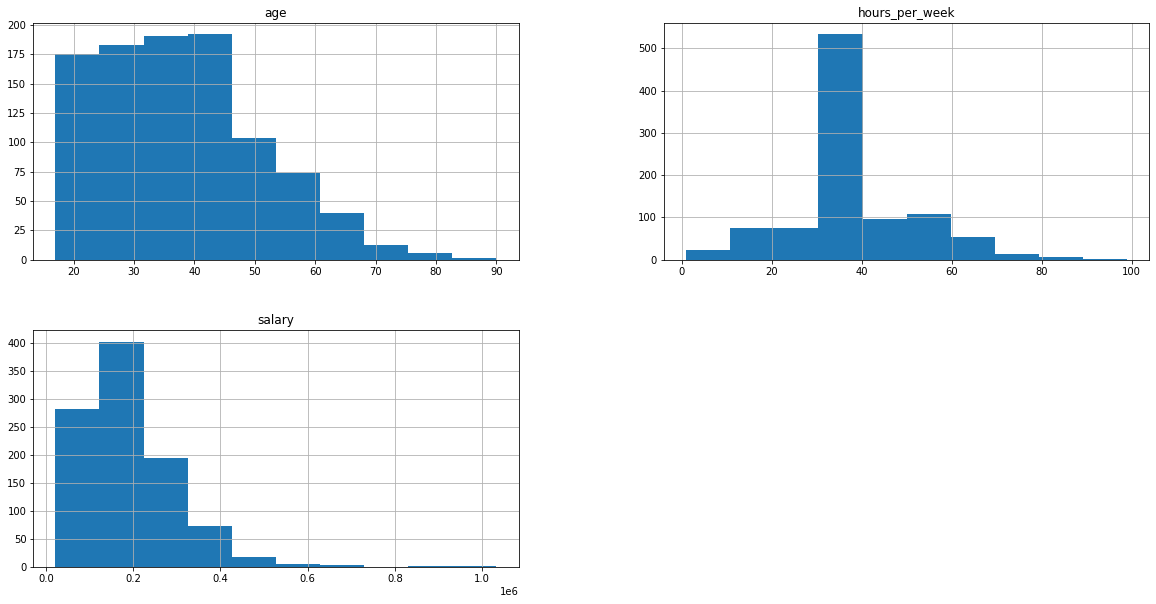

In [0]:
#Takes all numerical data (continous or categorical) and plots
df.hist(figsize=[20,10])

Inferences from the above:
1. Most of the employees are of age of around 18-48 yrs. The employee above 48 yrs are less compared to the former, and are decreasing gradually. And, 2-3 employees are of 90 yrs.
2. Approximately 550 employees work for 30-40 hours per week. Less than 100 employees work for 2-30 and 40-78 hours per week. And, about 2-3 employees work for 78-98 hours per week.
3. The majority of employees earn between 0.03-0.3 million.  

Bar plots for categorical variables

Text(0, 0.5, 'Number of Employees')

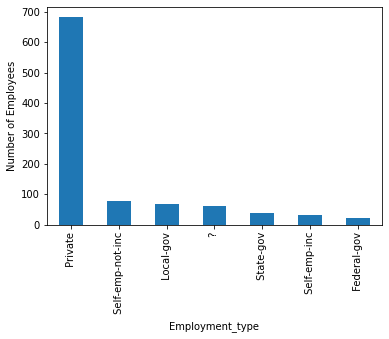

In [0]:
a=df.employment_type.value_counts().plot.bar()
a.set_xlabel('Employment_type')
a.set_ylabel('Number of Employees')

Inference drawn from the above:
- Most of the employees work in Private type than the other type of employments.

Text(0, 0.5, 'Number of Employees')

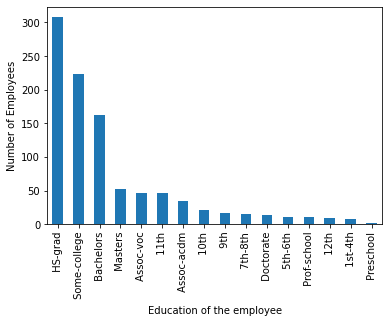

In [0]:
b=df.education.value_counts().plot.bar()
b.set_xlabel('Education of the employee')
b.set_ylabel('Number of Employees')

Inference from the above:
- Most employees are high school graduates followed by college students then masters and so on, even 2-3 preschooler are also employed.

Text(0, 0.5, 'Number of employees')

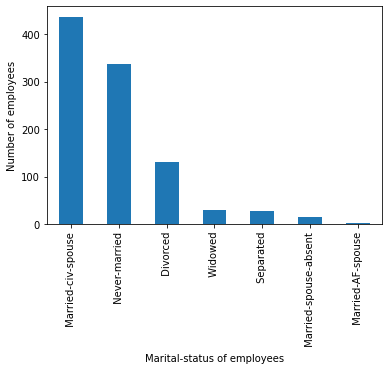

In [0]:
c=df['marital-status'].value_counts().plot.bar()
c.set_xlabel('Marital-status of employees')
c.set_ylabel('Number of employees')

Inference from the above:
- Most emoloyees are married-civ-spouse.

Text(0, 0.5, 'Number of Employees')

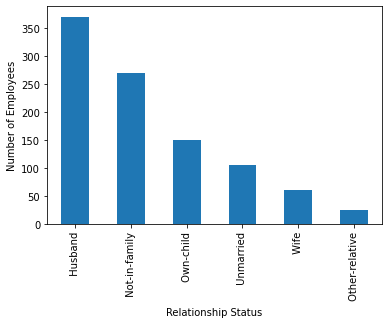

In [0]:
d=df.relationship.value_counts().plot.bar()
d.set_xlabel('Relationship Status')
d.set_ylabel('Number of Employees')

Inference from the above:
- Most employees are husbands.

Text(0, 0.5, 'Number of Employees')

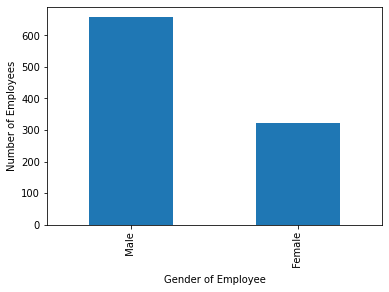

In [0]:
e=df.Gender.value_counts().plot.bar()
e.set_xlabel('Gender of Employee')
e.set_ylabel('Number of Employees')

Inference from the above:
- The number of employed males are more than the twice of employed females.

Text(0, 0.5, 'Number of Employees')

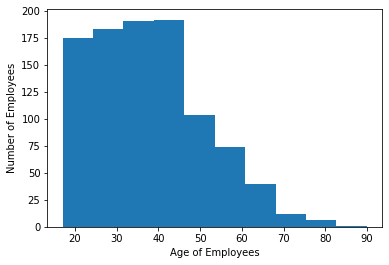

In [0]:
f=df.age.plot.hist()
f.set_xlabel('Age of Employees')
f.set_ylabel('Number of Employees')

**Problem 3- Show a bivariate analysis between Salary and hour_per_week.Choose a plot of your choice. Mention the inferences drawn**

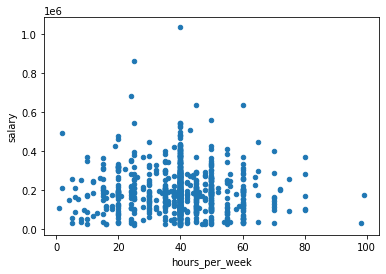

In [124]:
df.plot.scatter(x='hours_per_week',y='salary')

Inference drawn from the above:
- Employees working from 0-20 hours per week and 80-100 hour er week are earning comparatively lesser salary which is fine for the former as they are working less but unfair for the latter as they are working more but still getting lesser salary.
- Employee working around 40 hours per week earns comparatively higher salary.

**Problem 4- For each Education type , showcase the distribution of Salary .Use Seaborn Facetgrid & Line plot.Identify the key observations and mention them**

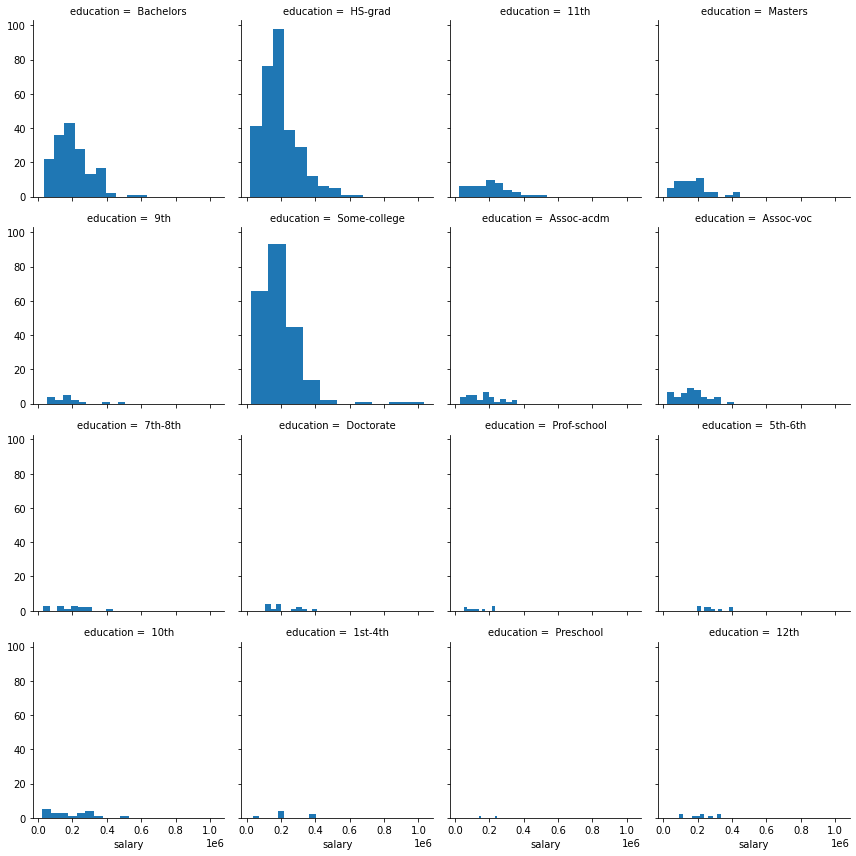

In [83]:
h=sn.FacetGrid(df,col='education',col_wrap=4,height=3)
h=h.map(plt.hist,'salary')

Inference from the above code:
- Hs_grad (high school graduates) employed more with lesser amount of salaries
- Majority of the employees receive salary under 50000. 
- Preschoolers have least employment which is fine.
- People with doctorate are less employed as per their qualifications. they should be employed more but this is not the case here.


**Problem 5- Categorizing each Gender & Relationship status (combination of all values) , plot the hours_per_week worked.Choose appropriate plots.Mention the inferences drawn**

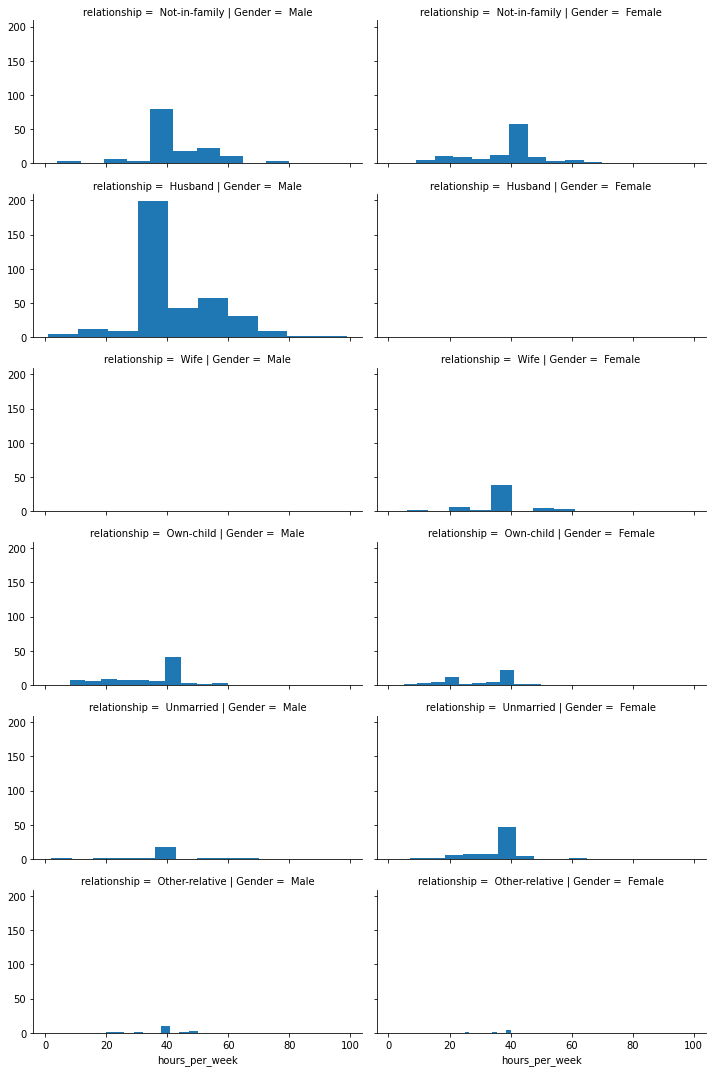

In [78]:
i=sn.FacetGrid(df,col='Gender',row='relationship',palette="GnBu_d",gridspec_kws={"width_ratios": [4, 4]}, height=2.5,aspect=2)
i=i.map(plt.hist,"hours_per_week")

Inference drawn from the above:
- Number of employees are maximum when gender is male
- Males husbands are working for more hours per week

**Problem 6- How many Males that have Marital status ‘Married-civ-spouse’ are earning above 150,000 ?**

In [96]:
d=df[(df['Gender'] == ' Male') & (df['marital-status'] == ' Married-civ-spouse') & (df['salary']>150000)]
d

,age,employment_type,salary,education,marital-status,relationship,Gender,hours_per_week
3,53,Private,234721,11th,Married-civ-spouse,Husband,Male,40
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Husband,Male,45
9,42,Private,159449,Bachelors,Married-civ-spouse,Husband,Male,40
10,37,Private,280464,Some-college,Married-civ-spouse,Husband,Male,80
15,34,Private,245487,7th-8th,Married-civ-spouse,Husband,Male,45
...,...,...,...,...,...,...,...,...
967,55,Self-emp-not-inc,189721,HS-grad,Married-civ-spouse,Husband,Male,20
968,48,Private,164966,Bachelors,Married-civ-spouse,Husband,Male,40
970,34,Private,202046,HS-grad,Married-civ-spouse,Husband,Male,35
973,37,Private,200153,HS-grad,Married-civ-spouse,Husband,Male,40


In [99]:
print('Males that have Marital status ‘Married-civ-spouse’ are earning above 150,000=',d['Gender'].count())

Males that have Marital status ‘Married-civ-spouse’ are earning above 150,000= 226


**Problem 7- Are Divorced Individuals of higher age compared to Individuals that are Not-in-family ? Using mean as a measure , answer the above question & mention the respective age of the two groups**

In [123]:
a=df[(df['marital-status']==' Divorced') & (df['relationship'].isin([' Unmarried',' Own-child',' Other-relative']))]
print('Average Age of divorced individuals',a.age.mean())
b=df[(df['relationship']==' Not-in-family') & (df['marital-status'].isin([' Never-married',' Separated',' Widowed']))]
print('Average age of individuals that are not-in-family',b.age.mean())

Average Age of divorced individuals 40.67272727272727
Average age of individuals that are not-in-family 35.24867724867725


Yes, divorced individuals are of higher age as compared to the individuals that are not in family